## Exploration of large scientific dataset with OpenVisus and ITKwidgets

### OpenViSUS: install package

To execute this jupyter notebook have to install: OpenViSUS
```
python -m pip install OpenVisus

python -m OpenVisus configure
```

Note: ignore errors during the "configure" process

Alternatively, see below on how to install the packages directly from the jupyter notebook

### ITKwidgets: install package

You can install itkwidgets from the anaconda-navigator (environment tab, search for "itkwidgets" in "not installed packages).

Alternatively you can install it from an Anaconda console/prompt with:

`conda install itkwidgets`

### OpenViSUS: read from a remote dataset

In [9]:
%matplotlib notebook

import os,sys

# Here are commands to install a package (OpenVisus) directly from a jupyter notebook
# after you install those once you can comment those comment
!{sys.executable} -m pip install OpenVisus

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

import OpenVisus as ov

# Enable I/O component of OpenVisus
ov.DbModule.attach()

In [10]:
# function to read data from a remote dataset
# optional parameters: timestep, field (variable in the dataset), logic_box (bounding box of the query), resolution

# Note: the resolution value could sometime fetch a dataset with the wrong aspect ratio, 
# this because in the IDX format we double the size at each resolution on only one of the axis at a time

# function to plot the image data with matplotlib
# optional parameters: colormap, existing plot to reuse (for more interactivity)
def showData(data, cmap=None, plot=None):
    if(plot==None or cmap!=None):
        fig=plt.figure(figsize = (7,5))        
        plot = plt.imshow(data, origin='lower', cmap=cmap, aspect='auto')
        #plt.xlim(0, 90)
        #plt.ylim(0, 1)
        plt.show()
        return plot
    else:
        plot.set_data(data)
        plt.show()
        return plot

### Navigate time and resolution

In [11]:
# select a remote dataset (satellite imagery from NASA)
# this doesn't actually fetch any data, only metadata
dataset=ov.LoadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=nasa-llc-4320&amp;cached=1")

# what is the size of this dataset ?
# the logic box contains the extent of the dataset on the different axis
dataset.getLogicBox()

([0, 0, 0], [17280, 12960, 90])

In [12]:
# what is the maximum resolution ? 
# NOTE: don't use large values of the resolution for large query (you will be fetching too much data)
dataset.getMaxResolution()

36

### Interactive analysis

### Working with 3D datasets

<IPython.core.display.Javascript object>


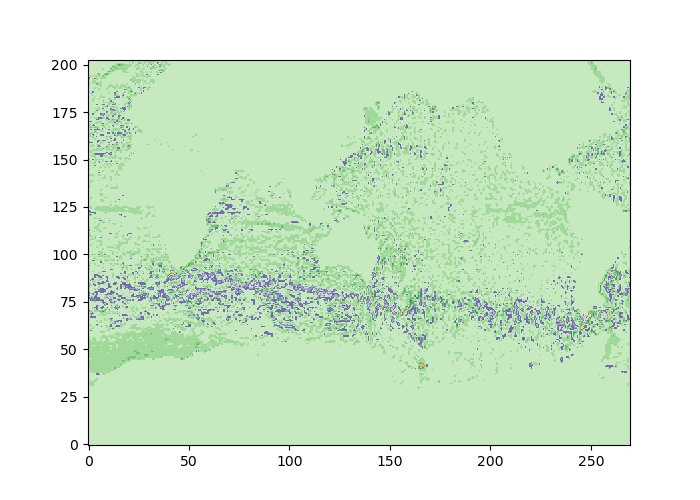

In [13]:
# make a query to fetch a slice of this 3D dataset (in the middle of the 3rd axis)
z_slice=dataset.read(x=[0,17280],y=[0,12960],z=[40,41],max_resolution=24)
showData(z_slice[0,:,:], cmap='tab20c')

In [24]:
# z (depth) slicing with interaction
def g(zz):
    z_slice=dataset.read(x=[0,17280],y=[0,12960],z=[zz,zz+1],max_resolution=25)
    print(z_slice.shape)
    showData(z_slice[0,:,:], cmap='tab20c')    
    
interact(g, zz=40, min=0, max=90)

interactive(children=(IntSlider(value=40, description='zz', max=120, min=-40), Output()), _dom_classes=('widge…

<function __main__.g(zz)>

(90, 405, 270)


<IPython.core.display.Javascript object>


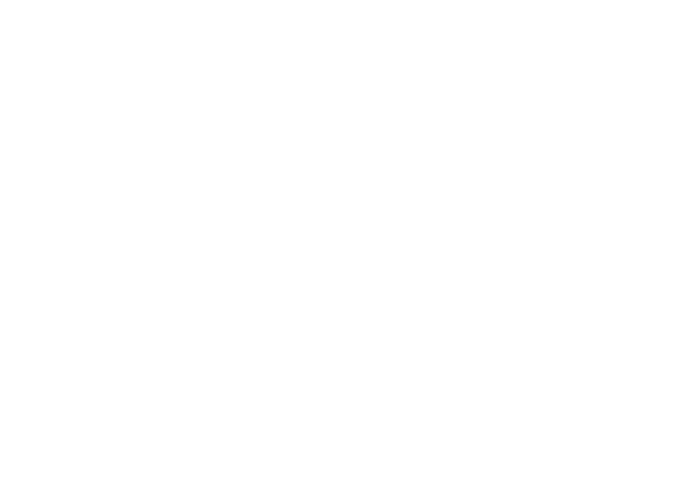

In [28]:
# vertical slice (by first extracting the volume)
volume = dataset.read(x=[0,17280],y=[0,12960],z=[0,90],max_resolution=25)
print(volume.shape)
showData(volume[:,:,0], cmap='tab20c')

In [29]:
# vertical slice with interaction
volume = dataset.read(x=[0,17280],y=[0,12960],z=[0,90],max_resolution=25)
print(volume.shape)

def f(xx):
    showData(volume[:,:,xx], cmap='tab20c')
    
interact(f, xx=100, min=0, max=volume.shape[2])

(90, 405, 270)


interactive(children=(IntSlider(value=100, description='xx', max=300, min=-100), Output()), _dom_classes=('wid…

<function __main__.f(xx)>